# DATA INFO



**KETERANGAN VARIABEL**

Y = Hasil tangkapan (produksi kerang)

X1 = Harga jual kerang (Rp/kg)

X2 = Biaya operasi melaut (Rp)

X3 = Pendapatan nelayan (Rp/kg)

X4 = Jumlah trip operasi (kali melaut)

X5 = Umur nelayan (tahun)

X6 = Pengalaman usaha (tahun)

X7 = Jumlah tanggungan keluarga (orang)

X8 = Pendidikan nelayan (kategori: tidak sekolah, SD, SMP)

In [ ]:
import pandas as pd

df = pd.read_csv("data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       85 non-null     int64
 1   X1      85 non-null     int64
 2   X2      85 non-null     int64
 3   X3      85 non-null     int64
 4   X4      85 non-null     int64
 5   X5      85 non-null     int64
 6   X6      85 non-null     int64
 7   X7      85 non-null     int64
 8   X8      85 non-null     int64
dtypes: int64(9)
memory usage: 6.1 KB


In [ ]:
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8
0,760,16333,3200000,13773333,20,42,29,3,2
1,640,16000,2240000,8000000,16,30,15,3,2
2,520,16000,2000000,6320000,16,60,48,5,2
3,480,16333,2160000,5680000,20,55,38,3,2
4,640,16333,2480000,7973333,20,35,20,2,2


# DUMMY

Karena pendidikan (X8) adalah data kategori, bukan angka yang punya jarak nilai yang jelas. Kalau dipaksakan langsung masuk regresi, angkanya (1, 2, 3) akan dianggap memiliki urutan atau tingkatan padahal bukan skala numerik. Maka dilakukan dummy untuk:

* mengubah kategori → 0/1
* membuat kategori pendidikan bisa dianalisis dalam regresi
* menentukan baseline (pembanding), yaitu tidak sekolah

Jadinya:
* tidak_sekolah(1 jika TS)
* PENDIDIKAN_SMP (1 jika SMP)

In [ ]:
#DUMMY PADA X8 dengan BASELINE SD

# buat dummy tanpa menghapus kategori
df = pd.get_dummies(df, columns=['X8'], drop_first=False)

# hapus kategori SD
df = df.drop(columns=['X8_2'])

# rename kolom
df = df.rename(columns={
    'X8_1': 'TS',
    'X8_3': 'SMP'
})

df['TS'] = df['TS'].astype(int)
df['SMP'] = df['SMP'].astype(int)

df.head(10)


,Y,X1,X2,X3,X4,X5,X6,X7,TS,SMP
0,760,16333,3200000,13773333,20,42,29,3,0,0
1,640,16000,2240000,8000000,16,30,15,3,0,0
2,520,16000,2000000,6320000,16,60,48,5,0,0
3,480,16333,2160000,5680000,20,55,38,3,0,0
4,640,16333,2480000,7973333,20,35,20,2,0,0
5,820,16333,3300000,16133333,20,38,15,4,1,0
6,600,16333,2400000,7400000,20,22,10,3,0,0
7,640,16000,2240000,8000000,16,35,10,2,0,0
8,780,16333,2760000,9980000,20,49,27,4,0,0
9,520,16333,2240000,6253333,20,26,15,4,0,0


Variabel pendidikan diubah menjadi dua variabel dummy, yaitu TS (1 jika tidak sekolah, 0 lainnya) dan SMP (1 jika berpendidikan SMP, 0 lainnya), sedangkan kategori SD dijadikan sebagai **baseline**.

Berdasarkan hasil regresi, kedua dummy memiliki nilai p-value lebih besar dari 0,05 sehingga tidak signifikan. Artinya, tidak terdapat perbedaan yang signifikan pada hasil tangkapan (Y) antara nelayan yang tidak sekolah maupun yang berpendidikan SMP dibandingkan dengan nelayan yang berpendidikan SD.

# REGRESI DUMMY

In [ ]:
import statsmodels.api as sm

In [ ]:
# Variabel Regresi
X = df[['X1','X2','X3','X4','X5','X6','X7',
        'TS', 'SMP']]
Y = df['Y']

X = sm.add_constant(X)

# Regresi OLS
model = sm.OLS(Y, X).fit()

# summary
print(model.summary())

#Model Persamaan
print("\n=== Persamaan Model Regresi ===")
coef = model.params

persamaan = (
    f"Y = {coef['const']:.4f}"
    f" + {coef['X1']:.4f}*X1"
    f" + {coef['X2']:.4f}*X2"
    f" + {coef['X3']:.4f}*X3"
    f" + {coef['X4']:.4f}*X4"
    f" + {coef['X5']:.4f}*X5"
    f" + {coef['X6']:.4f}*X6"
    f" + {coef['X7']:.4f}*X7"
    f" + {coef['TS']:.4f}*TS"
    f" + {coef['SMP']:.4f}*SMP"
)

print(persamaan)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     25.13
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           2.95e-19
Time:                        13:33:10   Log-Likelihood:                -464.87
No. Observations:                  85   AIC:                             949.7
Df Residuals:                      75   BIC:                             974.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1344.0558   1076.045     -1.249      0.2

In [ ]:
print("Persamaan Model Regresi")
coef = model.params

persamaan = (
    f"Y = {coef['const']:.4f}"
    f" + {coef['X1']:.4f}*X1"
    f" + {coef['X2']:.4f}*X2"
    f" + {coef['X3']:.4f}*X3"
    f" + {coef['X4']:.4f}*X4"
    f" + {coef['X5']:.4f}*X5"
    f" + {coef['X6']:.4f}*X6"
    f" + {coef['X7']:.4f}*X7"
    f" + {coef['TS']:.4f}*TS"
    f" + {coef['SMP']:.4f}*SMP"
)

print(persamaan)

Persamaan Model Regresi
Y = -1344.0558 + 0.1027*X1 + 0.0000*X2 + 0.0000*X3 + 4.0033*X4 + 1.4943*X5 + -1.3329*X6 + -11.5440*X7 + 3.3049*TS + -13.7350*SMP



\begin{aligned}
\hat{\beta}_0 &= -1344.0558 \\
\hat{\beta}_1 &= 0.1027 \\
\hat{\beta}_2 &= 0.0000 \\
\hat{\beta}_3 &= 0.0000 \\
\hat{\beta}_4 &= 4.0033 \\
\hat{\beta}_5 &= 1.4943 \\
\hat{\beta}_6 &= -1.3329 \\
\hat{\beta}_7 &= -11.5440 \\
\hat{\beta}_8 &= 3.3049 \quad (\text{TS}) \\
\hat{\beta}_9 &= -13.7350 \quad (\text{SMP})
\end{aligned}



\begin{aligned}
\hat{Y} =\;&
\beta_0
+ \beta_1 X_1
+ \beta_2 X_2
+ \beta_3 X_3 \\
&+ \beta_4 X_4
+ \beta_5 X_5
+ \beta_6 X_6
+ \beta_7 X_7 \\
&+ \beta_8 (\text{SD})
+ \beta_9 (\text{SMP})
\end{aligned}


$$
\hat{Y} = -1344.0558
+ 0.1027\, X_1
+ 0.0000\, X_2
+ 0.0000\, X_3
+ 4.0033\, X_4
+ 1.4943\, X_5
- 1.3329\, X_6
- 11.5440\, X_7
+ 3.3049\, TS
- 13.7350\, SMP
$$


Berdasarkan model regresi dummy, kategori pendidikan menggunakan SD sebagai baseline.
Hasil estimasi menunjukkan bahwa:

=>Nelayan Tidak Sekolah (TS) memiliki produksi 3,30 kg lebih tinggi dibandingkan nelayan yang berpendidikan SD.

=>Nelayan lulusan SMP memiliki produksi 13,74 kg lebih rendah dibandingkan nelayan yang berpendidikan SD.

Hasil ini menunjukkan bahwa tingkat pendidikan yang lebih tinggi tidak selalu meningkatkan produktivitas, kemungkinan karena nelayan yang tidak bersekolah memiliki pengalaman praktik yang lebih panjang, atau bekerja dengan intensitas lebih tinggi dibandingkan kelompok berpendidikan SD dan SMP.

Jika semua variabel X bernilai nol dan pendidikan nelayan adalah SD (baseline), maka produksi nelayan diprediksi sebesar –1344,06 kg.

Nilai intersep ini memang tidak memiliki makna ekonomi langsung, karena tidak mungkin semua variabel X bernilai nol.
Namun intersep tetap diperlukan secara matematis untuk membangun model regresi.

## UJI ASUMSI KLASIK

### Uji Normalitas Residual

In [ ]:
from scipy.stats import jarque_bera
jb = jarque_bera(model.resid)
print(jb)

SignificanceResult(statistic=np.float64(4.212465419251565), pvalue=np.float64(0.1216955664722203))


Hipotesis:

H0: Residual berdistribusi normal.

H1: Residual tidak berdistribusi normal.

Kriteria Keputusan:

Jika p-value > 0.05 → gagal tolak H0 (residual normal)

Jika p-value ≤ 0.05 → tolak H0 (residual tidak normal)

Hasil Uji Shapiro–Wilk:

Statistik W = 4.212

p-value = 0.121

Karena p-value 0.121 > 0.05, maka gagal tolak H0. Dengan demikian, residual pada model regresi berdistribusi normal.

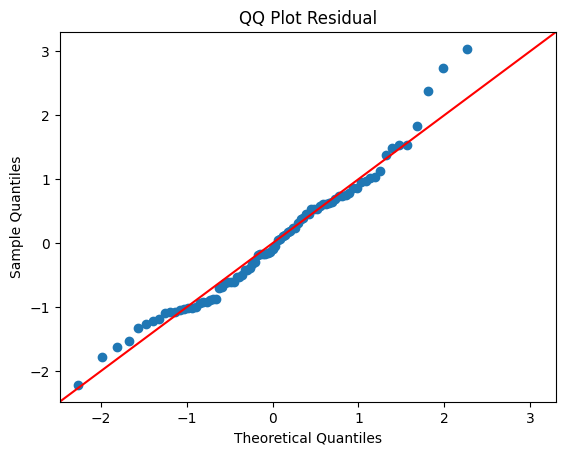

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# QQ Plot residual
sm.qqplot(model.resid, line='45', fit=True)
plt.title("QQ Plot Residual")
plt.show()

QQ-Plot, titik-titik residual menyebar mengikuti garis diagonal dengan penyimpangan kecil pada bagian ujung. Hal ini menunjukkan bahwa residual berdistribusi normal. Hasil ini juga diperkuat oleh uji Shapiro–Wilk yang menghasilkan p-value 0.121 (> 0.05), sehingga dapat disimpulkan bahwa asumsi normalitas terpenuhi.

### Uji Autokorelasi

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(model.resid)
print("Durbin Watson:", dw)

Durbin Watson: 1.9720828516008155


Hipotesis:

H0: Tidak terdapat autokorelasi.

H1: Terdapat autokorelasi.

Kriteria Keputusan Berdasarkan Nilai DW:

DW < 1.5 → terdapat autokorelasi positif

1.5 ≤ DW ≤ 2.5 → tidak terdapat autokorelasi

DW > 2.5 → terdapat autokorelasi negatif

Nilai Durbin–Watson (DW) = 1.972.

Karena nilai DW 1.972 berada dalam rentang 1.5 hingga 2.5, maka gagal tolak H0.

Tidak terdapat autokorelasi pada model regresi.

Residual bersifat independen sehingga memenuhi asumsi klasik autokorelasi.



### Uji Multikolinearitas

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Variabel independen
X_vars = X[['X1','X2','X3','X4','X5','X6','X7','TS','SMP']]

# Tambahkan konstanta
X_vif = sm.add_constant(X_vars)

# Hitung VIF
vif = pd.DataFrame()
vif["Variabel"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif)

  Variabel           VIF
0    const  26351.475525
1       X1      1.777613
2       X2      1.708470
3       X3      1.716617
4       X4      1.887545
5       X5      3.369672
6       X6      3.422866
7       X7      1.147598
8       TS      1.131161
9      SMP      1.117834


H0: Tidak terjadi multikolinearitas (VIF ≤ 10)

H1: Terjadi multikolinearitas (VIF > 10)

Kriteria Keputusan:

Jika VIF ≤ 10 → gagal tolak H0 (tidak ada multikolinearitas).

Jika VIF > 10 → tolak H0 (terjadi multikolinearitas).

| Variabel | VIF   | Keputusan                                          |
| -------- | ----- | -------------------------------------------------- |
| X1       | 1.777 | **Tidak ada multikolinearitas**                    |
| X2       | 1.708 | **Tidak ada multikolinearitas**                    |
| X3       | 1.716 | **Tidak ada multikolinearitas**                    |
| X4       | 1.887 | **Tidak ada multikolinearitas**                    |
| X5       | 3.369 | **Tidak ada multikolinearitas**                    |
| X6       | 3.422 | **Tidak ada multikolinearitas**                    |
| X7       | 1.147 | **Tidak ada multikolinearitas**                    |
| TS       | 1.131 | **Tidak ada multikolinearitas**                    |
| SMP      | 1.117 | **Tidak ada multikolinearitas**                    |



Seluruh variabel memiliki nilai VIF jauh di bawah 10, sehingga gagal tolak H0. Dengan demikian:

Model tidak mengalami multikolinearitas.

### Uji Heteroskedastisitas

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

residual = model.resid
bp_test = het_breuschpagan(residual, model.model.exog)

bp_labels = ['LM Statistic','LM-Test p-value','F-Statistic','F-Test p-value']
print(dict(zip(bp_labels, bp_test)))

{'LM Statistic': np.float64(9.034998591828012), 'LM-Test p-value': np.float64(0.4340498032741723), 'F-Statistic': np.float64(0.9911360960469952), 'F-Test p-value': np.float64(0.45467103478621573)}



Hipotesis:

H0: Tidak ada heteroskedastisitas (varian residual konstan)

H1: Ada heteroskedastisitas (varian residual tidak konstan)

Kriteria keputusan:

Jika p-value > 0.05 → gagal tolak H0 → tidak ada heteroskedastisitas

 Hasil Analisis
1. Berdasarkan LM p-value

LM p-value = 0.4340 > 0.05

 Gagal tolak H0 → tidak ada heteroskedastisitas

2. Berdasarkan F-Test p-value

F p-value = 0.4547 > 0.05

 Gagal tolak H0 → tidak ada heteroskedastisitas

tidak mengalami heteroskedastisitas.
Residual sudah homoskedastis

# REGRESI POLINOMIAL

In [ ]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from io import StringIO
import warnings
warnings.filterwarnings("ignore")

/tmp/ipython-input-264312781.py:21: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs_quad = np.polyfit(df[x_var], df['Y'], 2)


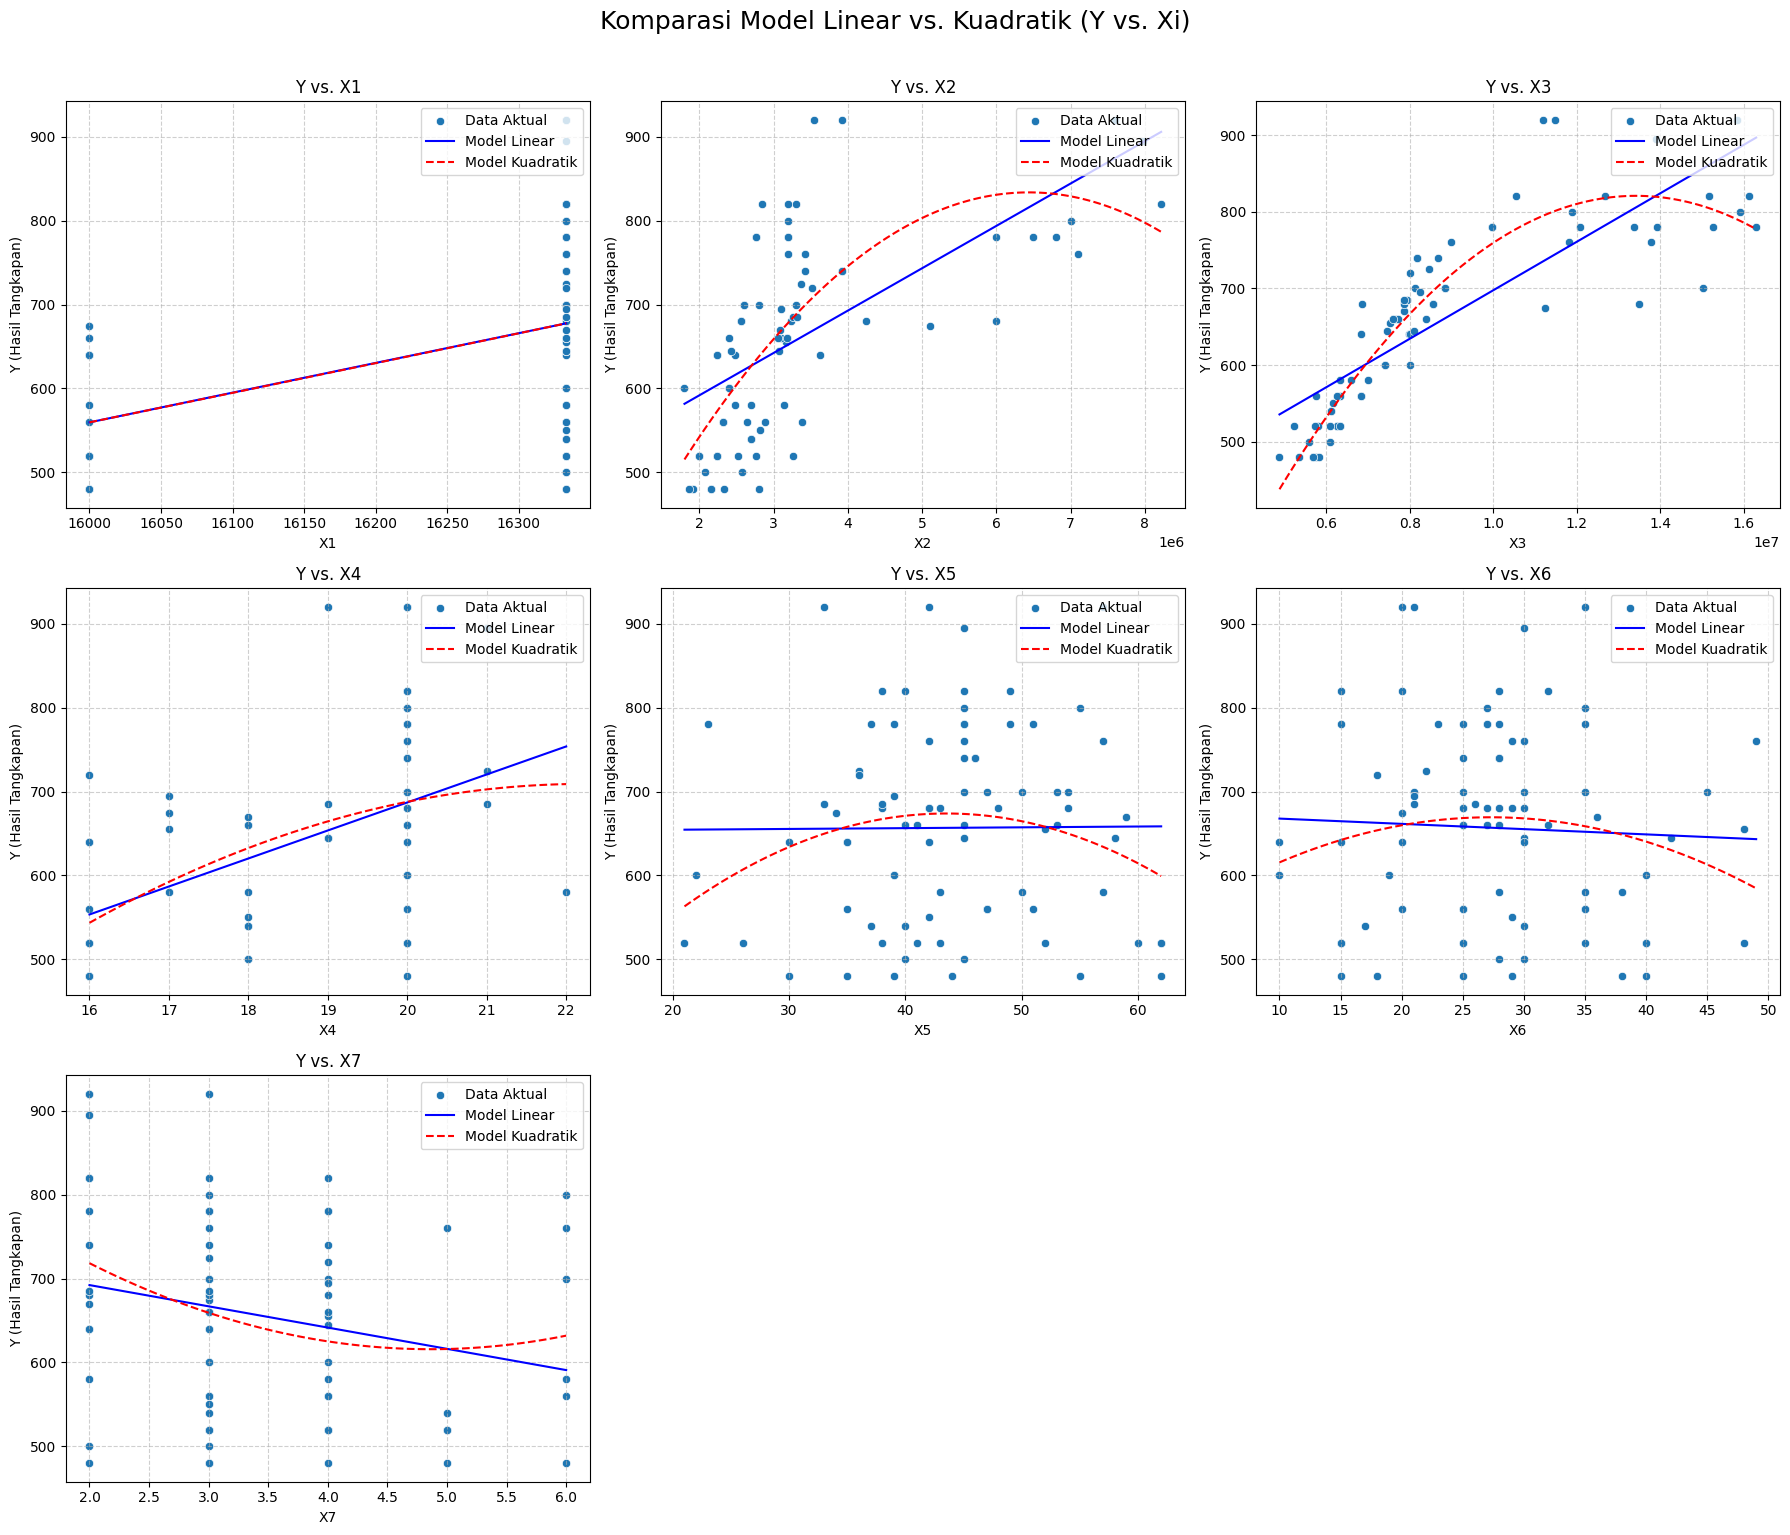

In [ ]:
# Menentukan Variabel Kontinu ---
variabel_x_kontinu = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']

# Plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

plt.suptitle('Komparasi Model Linear vs. Kuadratik (Y vs. Xi)', fontsize=18, y=1.02)

for i, x_var in enumerate(variabel_x_kontinu):
    ax = axes[i]

    # Scatter plot data aktual
    sns.scatterplot(x=df[x_var], y=df['Y'], ax=ax, label='Data Aktual')

    # 1. Hitung dan Plot Garis Regresi Linear (Derajat 1)
    poly_coeffs_linear = np.polyfit(df[x_var], df['Y'], 1)
    poly_fit_linear = np.poly1d(poly_coeffs_linear)

    # 2. Hitung dan Plot Garis Regresi Kuadratik (Derajat 2)
    poly_coeffs_quad = np.polyfit(df[x_var], df['Y'], 2)
    poly_fit_quad = np.poly1d(poly_coeffs_quad)

    x_fit = np.linspace(df[x_var].min(), df[x_var].max(), 100)

    ax.plot(x_fit, poly_fit_linear(x_fit), color='blue', linestyle='-', label='Model Linear')
    ax.plot(x_fit, poly_fit_quad(x_fit), color='red', linestyle='--', label='Model Kuadratik')

    ax.set_title(f'Y vs. {x_var}')
    ax.set_xlabel(x_var)
    ax.set_ylabel('Y (Hasil Tangkapan)')
    ax.legend(loc='upper right')
    ax.grid(True, linestyle='--', alpha=0.6)

# Menyembunyikan subplot yang tidak terpakai
for j in range(len(variabel_x_kontinu), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 1.01])
plt.show()

In [ ]:
# 1. Tambahkan Suku Kuadratik (Polinomial Derajat 2)
df['X2_sq'] = df['X2']**2
df['X3_sq'] = df['X3']**2

# 2. Definisikan Variabel Independen (X) dan Dependen (Y)
# Mengganti 'X8' dengan variabel dummy 'TS' dan 'SMP'
X_cols = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X2_sq', 'X3_sq', 'TS', 'SMP']
y = df['Y']
X = df[X_cols]

# 3. Tambahkan konstanta untuk model regresi (Intercept)
X = sm.add_constant(X)

# 4. Fit Model
model = sm.OLS(y, X).fit()

# 5. Tampilkan Ringkasan Model
print(model.summary())

# 6. Analisis variabel dummy (TS dan SMP)
print("\n" + "="*50)
print("ANALISIS VARIABEL DUMMY (TS & SMP)")
print("="*50)

# Ambil p-value dari TS dan SMP
p_value_ts = model.pvalues.get('TS')
p_value_smp = model.pvalues.get('SMP')

# Ambil level signifikansi yang biasa digunakan (misalnya 0.05)
alpha = 0.05

if p_value_ts is not None:
    print(f"Nilai P untuk TS: {p_value_ts:.4f}")
    if p_value_ts < alpha:
        print("✅ KESIMPULAN: TS adalah variabel yang SIGNIFIKAN.")
    else:
        print("❌ KESIMPULAN: TS adalah variabel yang TIDAK SIGNIFIKAN.")
else:
    print("Variabel TS tidak ditemukan di ringkasan model.")

if p_value_smp is not None:
    print(f"Nilai P untuk SMP: {p_value_smp:.4f}")
    if p_value_smp < alpha:
        print("✅ KESIMPULAN: SMP adalah variabel yang SIGNIFIKAN.")
    else:
        print("❌ KESIMPULAN: SMP adalah variabel yang TIDAK SIGNIFIKAN.")
else:
    print("Variabel SMP tidak ditemukan di ringkasan model.")

print("\nCatatan: Jika variabel dummy tidak signifikan, pertimbangkan untuk menghapusnya dari model, kecuali ada alasan teoritis yang kuat untuk mempertahankannya.")

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     63.63
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           1.73e-31
Time:                        13:36:32   Log-Likelihood:                -432.32
No. Observations:                  85   AIC:                             884.6
Df Residuals:                      75   BIC:                             909.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0139      0.017      0.810      0.4

karena tidak signifikan, kami melakukan penghapusan variabel 'TS','SMP', X4, X5, X6, dan X7. Mempertahankan X1 dikarenakan t-hitung masih besar

In [ ]:
# Variabel yang akan distandardisasi (yang memiliki suku kuadratik)
cols_to_scale = ['X2', 'X3']

# Variabel yang akan tetap linier
cols_linear = ['X1'] # Hanya X1 yang signifikan secara linier

# 1. Standardisasi (Z-Score)
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# 2. Tambahkan Suku Polinomial dari variabel yang sudah distandardisasi
for col in cols_to_scale:
    df[f'{col}_sq'] = df[col]**2

# 3. Definisikan Variabel Akhir
X_cols_final = cols_linear + cols_to_scale + [f'{col}_sq' for col in cols_to_scale]
y = df['Y']
X = df[X_cols_final]

# 4. Tambahkan konstanta (Intercept)
X = sm.add_constant(X)

# 5. Fit Model Akhir
final_model = sm.OLS(y, X).fit()

# 6. Tampilkan Ringkasan Model Final
print("="*80)
print("              RINGKASAN MODEL REGRESI POLINOMIAL FINAL (STANDARDISASI)")
print("================================================================================")
print(final_model.summary())
print("="*80)

# Verifikasi Condition Number
print(f"VERIFIKASI CONDITION NUMBER FINAL: {final_model.condition_number:.2f}")

if final_model.condition_number < 1000:
    print("✅ Condition Number rendah. Masalah multikolinearitas telah teratasi.")
else:
     print("⚠️ Condition Number tinggi. Coba hapus variabel linier yang tersisa atau non-polinomial yang tidak signifikan.")

              RINGKASAN MODEL REGRESI POLINOMIAL FINAL (STANDARDISASI)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     105.5
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           1.71e-33
Time:                        13:42:59   Log-Likelihood:                -437.32
No. Observations:                  85   AIC:                             886.6
Df Residuals:                      79   BIC:                             901.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

menghapus X1 karena tidak signifikan

In [ ]:
# Variabel yang akan distandardisasi (yang memiliki suku kuadratik)
cols_to_scale = ['X2', 'X3']

# 1. Standardisasi (Z-Score)
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# 2. Tambahkan Suku Polinomial dari variabel yang sudah distandardisasi
for col in cols_to_scale:
    df[f'{col}_sq'] = df[col]**2

# 3. Definisikan Variabel Akhir
X_cols_final = cols_to_scale + [f'{col}_sq' for col in cols_to_scale]
y = df['Y']
X = df[X_cols_final]

# 4. Tambahkan konstanta (Intercept)
X = sm.add_constant(X)

# 5. Fit Model Akhir
final_model = sm.OLS(y, X).fit()

# 6. Tampilkan Ringkasan Model Final
print("="*80)
print("              RINGKASAN MODEL REGRESI POLINOMIAL FINAL (STANDARDISASI)")
print("================================================================================")
print(final_model.summary())
print("="*80)

# Verifikasi Condition Number
print(f"VERIFIKASI CONDITION NUMBER FINAL: {final_model.condition_number:.2f}")

if final_model.condition_number < 1000:
    print("✅ Condition Number rendah. Masalah multikolinearitas telah teratasi.")
else:
     print("⚠️ Condition Number tinggi. Coba hapus variabel linier yang tersisa atau non-polinomial yang tidak signifikan.")

              RINGKASAN MODEL REGRESI POLINOMIAL FINAL (STANDARDISASI)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     131.2
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           2.61e-34
Time:                        13:37:15   Log-Likelihood:                -437.99
No. Observations:                  85   AIC:                             886.0
Df Residuals:                      80   BIC:                             898.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------


sehingga didapat model regresi polinomial:
$$\mathbf{\hat{Y}} = \text{const} + \beta_1 \mathbf{X2_{std}} + \beta_2 \mathbf{X3_{std}} + \beta_3 \mathbf{X2^2_{std}} + \beta_4 \mathbf{X3^2_{std}}$$Jika dimasukkan dengan koefisien numerik dari ringkasan model:$$\mathbf{\hat{Y}} = 712.6039 + 42.2368 \mathbf{X2_{std}} + 131.9574 \mathbf{X3_{std}} - 13.5302 \mathbf{X2^2_{std}} - 42.3090 \mathbf{X3^2_{std}}$$